In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# hide RuntimeWarning pandas
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Laad data

In [3]:
## CBS summary data
cbs_sum_fp = "/Users/werk/Documents/git_hipnl/uu_link_dev/analyse_bestanden/n_pers_per_adres_en_stats_cats_2023_06_28_v2.xlsx"
cbs_sum = pd.read_excel(cbs_sum_fp)

# voeg year_mun_id toe
cbs_sum['year_mun_id'] = cbs_sum['year'].astype(str) + "_" + cbs_sum['municipality_cbs'].str.replace(" ", "_")

cbs_sum.fillna(0, inplace=True)

cbs_sum.head()

,year,cbs_year,amco,municipality_kohier,municipality_cbs,pct_records_included,n_all_records,n_records,n_adresses,n_adresses_surname,...,cat4,cat_sum,cat1_pct,cat2_pct,cat3_pct,cat4_pct,omvang_hh,hh_per_huis,inw_per_huis,year_mun_id
0,1889,1889,10327,Doesburg,Doesburg,0.976909,563,550,406,512,...,5,406,0.724,0.062,0.202,0.012,4.056147,1.222485,5.274556,1889_Doesburg
1,1879,1879,10327,Doesburg,Doesburg,0.996289,539,537,417,528,...,3,417,0.784,0.014,0.194,0.007,4.079380,1.141436,5.007735,1879_Doesburg
2,1881,1879,10909,Harlingen,Harlingen,0.972973,37,36,35,36,...,0,35,0.971,0.000,0.029,0.000,4.168417,1.223925,5.295106,1881_Harlingen
3,1889,1889,10909,Harlingen,Harlingen,0.982618,978,961,802,918,...,4,802,0.827,0.041,0.127,0.005,4.184792,0.000000,0.000000,1889_Harlingen
4,1899,1899,10007,Vaals,Vaals,0.986627,1346,1328,662,1264,...,39,662,0.601,0.030,0.310,0.059,4.192908,1.923602,8.673943,1899_Vaals


CBS DATA LARGE

In [4]:
## load cbs_sum_large, for determining refpop for municipalities without adress data
cbs_sum_large = pd.read_parquet("cbs_stats_summarized_all_municipalities_2023_07_06.parquet", engine="pyarrow")

# merge with cbs_sum
cbs_sum_large = pd.merge(cbs_sum_large, cbs_sum[['cbs_year','amco', 'cat1_pct', 'cat2_pct', 'cat3_pct', 'cat4_pct']], left_on=['amco', 'year'], right_on=['amco', 'cbs_year'], how='left')

# calculate refpop column
# berekenen proporties
cbs_sum_large['refpop'] = cbs_sum_large.cat1 * cbs_sum_large.cat1_pct + cbs_sum_large.cat2 * cbs_sum_large.cat2_pct + cbs_sum_large.cat3 * cbs_sum_large.cat3_pct
# make cbs_sum['refpop_prop'] integer
cbs_sum_large['refpop'] = cbs_sum_large['refpop'].astype(int)

cbs_sum_large.head()

,year,amco,municipality,bewoonde_huizen,bewoonde_schepen,afzonderlijk_levenden,huisgezinnen,bevolking,beroepsbevolking,bewoonde_huizen_schepen,...,verwant_huizing,cat1,cat2,cat3,cbs_year,cat1_pct,cat2_pct,cat3_pct,cat4_pct,refpop
0,1849,10534,'s-Graveland,143.0,1.0,0.0,270.0,1247.0,<NA>,144.0,...,<NA>,270.0,540.0,270.0,NaN,NaN,NaN,NaN,NaN,0
1,1849,10052,'s-Gravendeel,312.0,0.0,0.0,530.0,2368.0,<NA>,312.0,...,<NA>,530.0,1060.0,530.0,NaN,NaN,NaN,NaN,NaN,0
2,1849,11434,'s-Gravenhage,10346.0,92.0,0.0,16011.0,72225.0,<NA>,10438.0,...,<NA>,16011.0,32022.0,16011.0,NaN,NaN,NaN,NaN,NaN,0
3,1849,10469,'s-Gravenmoer,113.0,0.0,0.0,175.0,825.0,<NA>,113.0,...,<NA>,175.0,350.0,175.0,NaN,NaN,NaN,NaN,NaN,0
4,1849,11059,'s-Gravenpolder,109.0,0.0,0.0,139.0,667.0,<NA>,109.0,...,<NA>,139.0,278.0,139.0,NaN,NaN,NaN,NaN,NaN,0


HDNG

In [5]:
hdng = pd.read_parquet("HDNG_v4_1849_1925.parquet", engine="pyarrow")
hdng.head()

,amco,name,variable,description,information,sex,year,visualisation_year,value,sources,remark_1,remark_2,remark_3,remark_4
14360,10002,ZUIDLAREN,C849ANG1,Aantal gelovigen,Anglikaans Episcopalen,M,1849,1849,0.0,30,10.5,<NA>,<NA>,<NA>
14361,10004,ZIJPE,C849ANG1,Aantal gelovigen,Anglikaans Episcopalen,M,1849,1849,0.0,30,10.5,<NA>,<NA>,<NA>
14362,10005,OPSTERLAND,C849ANG1,Aantal gelovigen,Anglikaans Episcopalen,M,1849,1849,0.0,30,10.5,<NA>,<NA>,<NA>
14363,10006,BAARDWIJK,C849ANG1,Aantal gelovigen,Anglikaans Episcopalen,M,1849,1849,0.0,30,10.5,<NA>,<NA>,<NA>
14364,10007,VAALS,C849ANG1,Aantal gelovigen,Anglikaans Episcopalen,M,1849,1849,0.0,30,10.5,<NA>,<NA>,<NA>


TAX DATA

In [6]:
tax_records_fp = "/Users/werk/Documents/git_hipnl/data/tax_records/tax_records_latest.parquet"
tax_records = pd.read_parquet(tax_records_fp, engine='pyarrow')
# add record_id, for easy reference. This is actually the order of the records in the parquet file
tax_records['tax_record_id'] = range(tax_records.shape[0])

tax_records.head()

,page_nr,place,volgnummer,wijk,house_nr_wijk,street,house_nr_street,title,firstnames,initials,...,marital_status,tax_raad2,deducations,income,month,notes_cleaning,cbs_year,cbscode,year_mun_id,tax_record_id
0,1,Eindhoven,1,<NA>,<NA>,Kerkstraat,9,Wed,<NA>,H.,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1920,GM0772,1917_Eindhoven,0
1,1,Eindhoven,2,<NA>,<NA>,Vrijstraat,47,<NA>,<NA>,A.,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1920,GM0772,1917_Eindhoven,1
2,1,Eindhoven,3,<NA>,<NA>,Vrijstraat,1,<NA>,Cath.,C.,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1920,GM0772,1917_Eindhoven,2
3,1,Eindhoven,4,<NA>,<NA>,Markt,14,<NA>,<NA>,H.,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1920,GM0772,1917_Eindhoven,3
4,1,Eindhoven,5,<NA>,<NA>,Prins Hendrikstraat,7a,<NA>,<NA>,J.,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1920,GM0772,1917_Eindhoven,4


In [7]:
tax_schedule_fp = "/Users/werk/Documents/git_hipnl/data/tax_records/tax_schedule_latest.parquet"
tax_schedule = pd.read_parquet(tax_schedule_fp, engine='pyarrow')
tax_schedule.head()

,class_nr,min,max,verhoudingscijfer,tax,grondslag voor berekening van de aanslag,year,file_name,place,municipality,...,has_duplicate,file_id,sheet_name,pct,pct1,tax1,pct2,tax2,income_gross,income_taxable
0,1,300,400,0.125,<NA>,50.0,1909,Uden_1909_2.2.xlsx,Uden,Uden,...,False,13021329944,tax_schedule,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2,401,500,0.125,<NA>,62.5,1909,Uden_1909_2.2.xlsx,Uden,Uden,...,False,13021329944,tax_schedule,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,3,501,600,0.125,<NA>,75.0,1909,Uden_1909_2.2.xlsx,Uden,Uden,...,False,13021329944,tax_schedule,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,4,601,700,0.150,<NA>,105.0,1909,Uden_1909_2.2.xlsx,Uden,Uden,...,False,13021329944,tax_schedule,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,5,701,800,0.150,<NA>,120.0,1909,Uden_1909_2.2.xlsx,Uden,Uden,...,False,13021329944,tax_schedule,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [8]:
# add year_mun_id to tax_schedule
file_id_year_mun_id_mapping = tax_records[['file_id', 'year_mun_id']].drop_duplicates().set_index('file_id').to_dict()['year_mun_id']
tax_schedule['year_mun_id'] = tax_schedule.file_id.map(file_id_year_mun_id_mapping)

In [9]:
tax_records.year_mun_id.unique().shape[0]

152

## Bewerk en filter data

#### Berwerk cbs

In [10]:
# refpop_cat1 = CBS_munics$huisgezinnen + CBS_munics$afzonderlijk_levenden
cbs_sum['cat1'] = cbs_sum['huisgezinnen'] + cbs_sum['afzonderlijk_levenden']

# refpop_cat2 = CBS_munics$afzonderlijk_levenden + (CBS_munics$huisgezinnen*2) + CBS_munics$overige_leden_huisgezin
cbs_sum['cat2'] = cbs_sum['afzonderlijk_levenden'] + (cbs_sum['huisgezinnen']*2) + cbs_sum['overige_leden_huisgezin']

# refpop_cat3 = CBS_munics$afzonderlijk_levenden + CBS_munics$huisgezinnen + CBS_munics$overige_leden_huisgezin
cbs_sum['cat3'] = cbs_sum['afzonderlijk_levenden'] + cbs_sum['huisgezinnen'] + cbs_sum['overige_leden_huisgezin'] + cbs_sum['niet_verwant_huizing']

# berekenen proporties
cbs_sum['refpop_prop'] = cbs_sum.cat1 * cbs_sum.cat1_pct + cbs_sum.cat2 * cbs_sum.cat2_pct + cbs_sum.cat3 * cbs_sum.cat3_pct
# make cbs_sum['refpop_prop'] integer
cbs_sum['refpop_prop'] = cbs_sum['refpop_prop'].astype(int)


# filte cbs_sum where no refpop is present
cbs_sum_ref = cbs_sum[cbs_sum.refpop_prop > 0]
cbs_sum_ref.head()

,year,cbs_year,amco,municipality_kohier,municipality_cbs,pct_records_included,n_all_records,n_records,n_adresses,n_adresses_surname,...,cat_sum,cat1_pct,cat2_pct,cat3_pct,cat4_pct,omvang_hh,hh_per_huis,inw_per_huis,year_mun_id,refpop_prop
0,1889,1889,10327,Doesburg,Doesburg,0.976909,563,550,406,512,...,406,0.724,0.062,0.202,0.012,4.056147,1.222485,5.274556,1889_Doesburg,1352
1,1879,1879,10327,Doesburg,Doesburg,0.996289,539,537,417,528,...,417,0.784,0.014,0.194,0.007,4.079380,1.141436,5.007735,1879_Doesburg,1255
2,1881,1879,10909,Harlingen,Harlingen,0.972973,37,36,35,36,...,35,0.971,0.000,0.029,0.000,4.168417,1.223925,5.295106,1881_Harlingen,2543
3,1889,1889,10909,Harlingen,Harlingen,0.982618,978,961,802,918,...,802,0.827,0.041,0.127,0.005,4.184792,0.000000,0.000000,1889_Harlingen,2817
4,1899,1899,10007,Vaals,Vaals,0.986627,1346,1328,662,1264,...,662,0.601,0.030,0.310,0.059,4.192908,1.923602,8.673943,1899_Vaals,1771


Filter cbs_sum_large -> keep year mun from tax records

In [11]:
##  filter cbs_sum_large; keep amco-year combiniations that are in tax_records
# create amco_year column
tax_records['amco_year'] = tax_records.amco.astype(str) + "_" + tax_records.cbs_year.astype(str)
cbs_sum_large['amco_year'] = cbs_sum_large.amco.astype(str) + "_" + cbs_sum_large.year.astype(str)

# Add year_mun_id to cbs_sum_large
# create mapping
acmo_year_mun_id_mapping = tax_records[['amco_year', 'year_mun_id']].drop_duplicates().set_index('amco_year').to_dict()['year_mun_id']
# map to cbs_large
cbs_sum_large['year_mun_id'] = cbs_sum_large.amco_year.map(acmo_year_mun_id_mapping)


# Add year_mun_id where it is missing (i.e. not in tax_records)
cbs_sum_large.loc[cbs_sum_large.year_mun_id.isna(), 'year_mun_id'] = cbs_sum_large['year'].astype(str) + "_" + cbs_sum_large['municipality'].str.replace(" ", "_")


# # filter cbs_sum_large
# cbs_sum_large_filt = cbs_sum_large.query("amco_year.isin(@tax_records.amco_year)").copy()

# # inspect missing
# missing_amco_year = [i for i in tax_records.amco_year.unique().tolist() if i not in cbs_sum_large_filt.amco_year.tolist()]
# tax_records.query("amco_year.isin(@missing_amco_year)").year_mun_id.unique()


# add hdng data
# 'Gehuwden'
# 'Bevolking'


In [12]:
# Make long format from cbs_sum_large_filt
# cbs_large_long_prep = cbs_sum_large_filt.copy()
cbs_large_long_prep = cbs_sum_large.copy()


# rename refpop column
cbs_large_long_prep.rename(columns={"refpop" : "refpop_catprop"}, inplace=True)
# replace 0 in refpop_catprop with nan
cbs_large_long_prep.loc[cbs_large_long_prep.refpop_catprop == 0, 'refpop_catprop'] = np.nan

# add refpop_brp column with beroepsbevolking
cbs_large_long_prep["refpop_brp"] = cbs_large_long_prep.beroepsbevolking
# replace 0 with nan
cbs_large_long_prep.loc[cbs_large_long_prep.refpop_brp == 0, 'refpop_brp'] = np.nan

# add refpop_hh column with cat1
cbs_large_long_prep["refpop_hh"] = cbs_large_long_prep.cat1
# replace 0 with nan
cbs_large_long_prep.loc[cbs_large_long_prep.refpop_hh == 0, 'refpop_hh'] = np.nan



# add hdng male population to cbs_large_long_prep
hdng_male_pop = hdng.query("description == 'Bevolking' & information == 'totaal' & sex == 'M' & visualisation_year.isin(@cbs_sum_large.year.unique())").copy()
# check if visualisation_year is always equal to year, otherwise join on visualisation year, or fix it
assert hdng_male_pop.query("year != visualisation_year").year.unique().shape[0] == 0, "Visualisation year is always not equal to year!"

# add mannelijke bevolking to cbs_sum_large (rename 'value' column to 'bevolking_mannelijk')
cbs_large_long_prep = pd.merge(cbs_large_long_prep, hdng_male_pop[['amco', 'year', 'value']].rename(columns={"value" : "bevolking_mannelijk"}), on=['amco', 'year'], how='left')

In [48]:
# correct maarheeze 1879
maarheeze_1879 = cbs_large_long_prep.eval("year_mun_id == '1879_Maarheeze'")
cbs_large_long_prep.loc[maarheeze_1879, 'bevolking'] = 630


In [49]:
# make long format with year_mun_id as index, and the refpop columns as values
# cbs_large_long = cbs_large_long_prep.set_index(['year_mun_id'])[['refpop_catprop', 'refpop_brp', 'refpop_hh']].stack().reset_index().rename(columns={'level_1' : 'refpop_source', 0 : 'refpop'})
cbs_large_long = cbs_large_long_prep.set_index(['year_mun_id','year', 'bevolking', 'bewoonde_huizen_schepen', 'bevolking_mannelijk'])[['refpop_catprop', 'refpop_brp', 'refpop_hh']].stack().reset_index().rename(columns={0 : 'refpop'})

# rename level column to refpop_source
cbs_large_long = cbs_large_long.rename(columns={[i for i in cbs_large_long.columns if i.startswith('level')][0] : 'refpop_source'})

# make refpop integer
cbs_large_long.refpop = cbs_large_long.refpop.astype(int)

cbs_large_long

,year_mun_id,year,bevolking,bewoonde_huizen_schepen,bevolking_mannelijk,refpop_source,refpop
0,1849_'s-Graveland,1849,1247.0,144.0,560.0,refpop_hh,270
1,1849_'s-Gravendeel,1849,2368.0,312.0,1147.0,refpop_hh,530
2,1849_'s-Gravenhage,1849,72225.0,10438.0,32890.0,refpop_hh,16011
3,1849_'s-Gravenmoer,1849,825.0,113.0,400.0,refpop_hh,175
4,1849_'s-Gravenpolder,1849,667.0,109.0,335.0,refpop_hh,139
...,...,...,...,...,...,...,...
8683,1920_Vlaardingen,1920,25447.0,4232.0,12702.0,refpop_hh,5452
8684,1920_Vlissingen,1920,22511.0,3556.0,11200.0,refpop_hh,5461
8685,1920_Zaandam,1920,28828.0,6986.0,0.0,refpop_hh,7085
8686,1920_Zaandam,1920,28828.0,6986.0,14517.0,refpop_hh,7085


In [122]:
hdng.query("description == 'Kiesgerechtigden gemeenteraad' & visualisation_year.isin(@cbs_sum_large.year.unique())")

,amco,name,variable,description,information,sex,year,visualisation_year,value,sources,remark_1,remark_2,remark_3,remark_4


In [117]:
hdng.description.unique()

<ArrowStringArray>
[                           'Aantal gelovigen',
                                   'Bevolking',
                                   'Geboortes',
                                 'Overledenen',
                            'Aantal migranten',
                                 'Belastingen',
                                 'Oppervlakte',
               'Kiesgerechtigden gemeenteraad',
                'Onderwijsuitgaven in guldens',
                                  'Schoolgeld',
                'Bewaar- of kleinkinderschool',
                                       'Regio',
                          'Zuigelingensterfte',
      'Ondertekenaren volkspetitionement 1878',
                          'Geboorte-overschot',
                         'Vestigingsoverschot',
                                 'Alfabetisme',
                               'Schoolverzuim',
                  'Beroepsbevolking aardewerk',
          'Beroepsbevolking drukkersbedrijven',
              'Beroep

## Check statistieken

In [50]:
cbs_large_long['refpop_pct_bevolking'] = cbs_large_long.refpop / cbs_large_long.bevolking

cbs_large_long['refpop_pct_woningen'] = cbs_large_long.refpop / cbs_large_long.bewoonde_huizen_schepen

cbs_large_long['refpop_pct_bevolking_mannelijk'] = cbs_large_long.refpop / cbs_large_long.bevolking_mannelijk

[]

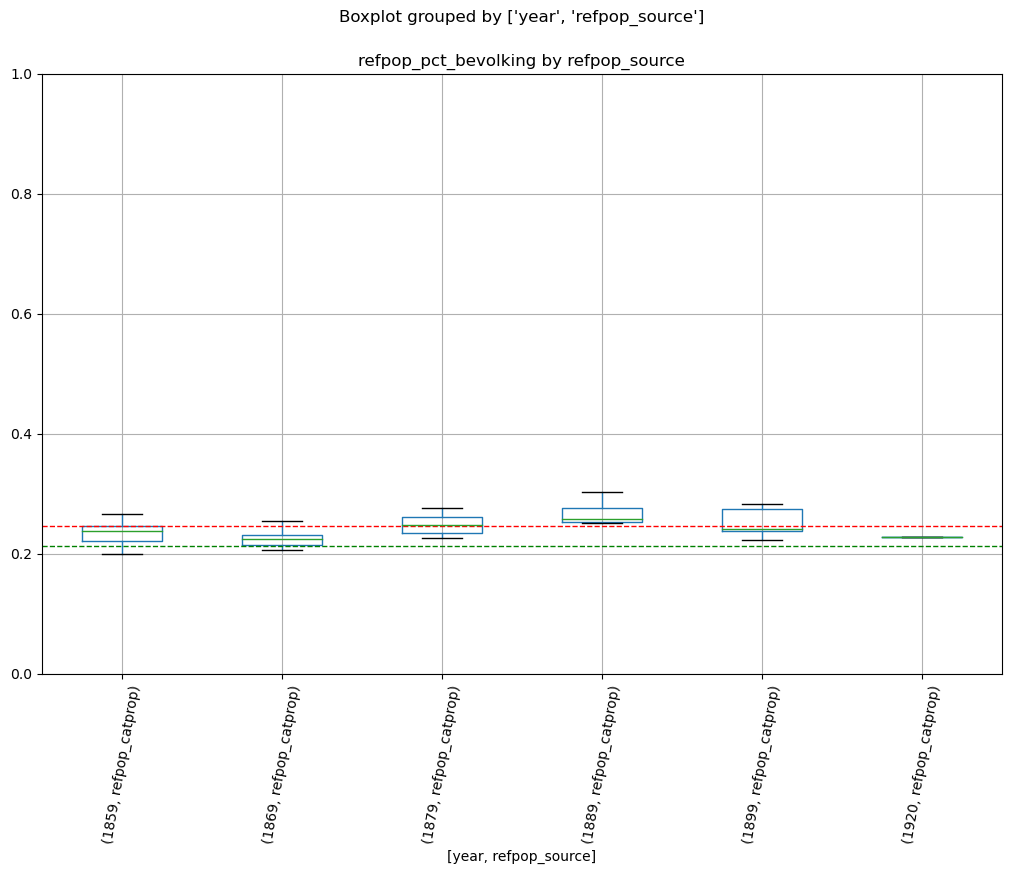

In [51]:
plot_df = cbs_large_long
plot_df = cbs_large_long.query("refpop_source == 'refpop_catprop'").copy()

mean_refpop_pct_bevolking_catprop =  cbs_large_long.query('refpop_source == "refpop_catprop"').refpop_pct_bevolking.mean()
mean_refpop_pct_bevolking_hh =  cbs_large_long.query('refpop_source == "refpop_hh"').refpop_pct_bevolking.mean()

# plot refpop_pct_bevolking by refpop_source
fig = plot_df.boxplot(column='refpop_pct_bevolking', by=['year', 'refpop_source'], figsize=(12,8), rot=80)
# set title
fig.title.set(text="refpop_pct_bevolking by refpop_source")
# set y limit to 0,1
plt.ylim(0,1)
# add horizontal line at mean_refpop_pct_bevolking_catprop
plt.axhline(mean_refpop_pct_bevolking_catprop, color='red', linestyle='dashed', linewidth=1)
# add horzontal line at mean_refpop_pct_bevolking_hh
plt.axhline(mean_refpop_pct_bevolking_hh, color='green', linestyle='dashed', linewidth=1)

fig.plot()

In [52]:
plot_df

,year_mun_id,year,bevolking,bewoonde_huizen_schepen,bevolking_mannelijk,refpop_source,refpop,refpop_pct_bevolking,refpop_pct_woningen,refpop_pct_bevolking_mannelijk
1274,1859_Aardenburg,1859,1635.0,308.0,789.0,refpop_catprop,405,0.247706,1.314935,0.513308
1439,1859_Brouwershaven,1859,1648.0,288.0,763.0,refpop_catprop,388,0.235437,1.347222,0.508519
1466,1859_Cothen,1859,695.0,118.0,373.0,refpop_catprop,139,0.200000,1.177966,0.372654
1659,1859_Harlingen,1859,9773.0,1532.0,4701.0,refpop_catprop,2347,0.240151,1.531984,0.499255
1758,1859_Hulst,1859,2265.0,414.0,1017.0,refpop_catprop,602,0.265784,1.454106,0.591937
2295,"1859_Vessem,_Wintelre_en_Knegsel",1859,1172.0,225.0,591.0,refpop_catprop,253,0.215870,1.124444,0.428088
2600,1869_Bladel_en_Netersel,1869,1365.0,286.0,<NA>,refpop_catprop,306,0.224176,1.06993,<NA>
2638,1869_Brouwershaven,1869,1738.0,309.0,<NA>,refpop_catprop,357,0.205409,1.15534,<NA>
2838,1870_Harlingen,1869,9945.0,2065.0,<NA>,refpop_catprop,2532,0.254600,1.22615,<NA>
2995,1870_Leende,1869,1389.0,306.0,<NA>,refpop_catprop,321,0.231102,1.04902,<NA>


<Axes: xlabel='bevolking_mannelijk', ylabel='refpop'>

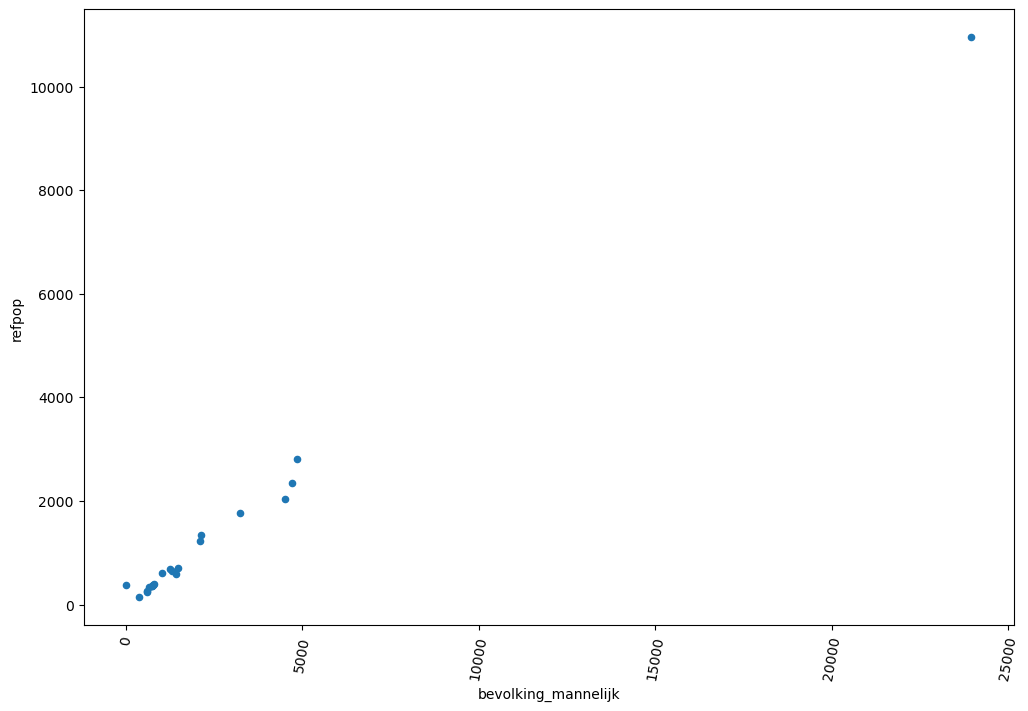

In [53]:
plot_df.plot(x='bevolking_mannelijk', y='refpop', kind='scatter', figsize=(12,8), rot=80)

In [54]:
plot_df[['bevolking_mannelijk', 'refpop']].corr()

,bevolking_mannelijk,refpop
bevolking_mannelijk,1.000000,0.997255
refpop,0.997255,1.000000


In [55]:
plot_df[['bevolking_mannelijk', 'bevolking', 'refpop']].corr()['refpop']

bevolking_mannelijk    0.997255
bevolking              0.997958
refpop                 1.000000
Name: refpop, dtype: float64

In [56]:
plot_df['refpop'] = plot_df['refpop'].astype(int)

In [129]:
cbs_large_long_prep.query("cat1_pct.notna()")

,year,amco,municipality,bewoonde_huizen,bewoonde_schepen,afzonderlijk_levenden,huisgezinnen,bevolking,beroepsbevolking,bewoonde_huizen_schepen,...,cat1_pct,cat2_pct,cat3_pct,cat4_pct,refpop_catprop,amco_year,year_mun_id,refpop_brp,refpop_hh,bevolking_mannelijk
1274,1859,11020,Aardenburg,308.0,0.0,54.0,337.0,1635.0,<NA>,308.0,...,0.917,0.019,0.064,0.000,405.0,11020_1859,1859_Aardenburg,<NA>,391.0,789.0
1438,1859,10030,Brouwershaven,271.0,17.0,12.0,336.0,1648.0,<NA>,288.0,...,0.698,0.000,0.287,0.016,388.0,10030_1859,1859_Brouwershaven,<NA>,348.0,763.0
1464,1859,11316,Cothen,118.0,0.0,3.0,135.0,695.0,<NA>,118.0,...,0.982,0.000,0.018,0.000,139.0,11316_1859,1859_Cothen,<NA>,138.0,373.0
1656,1859,10909,Harlingen,1463.0,69.0,200.0,2075.0,9773.0,<NA>,1532.0,...,0.901,0.019,0.074,0.006,2347.0,10909_1859,1859_Harlingen,<NA>,2275.0,4701.0
1754,1859,11408,Hulst,414.0,0.0,91.0,490.0,2265.0,<NA>,414.0,...,0.878,0.025,0.092,0.004,602.0,11408_1859,1859_Hulst,<NA>,581.0,1017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9046,1920,10132,Schinnen,502.0,0.0,0.0,<NA>,2864.0,<NA>,502.0,...,0.558,0.184,0.189,0.069,NaN,10132_1920,1920_Schinnen,<NA>,<NA>,1459.0
9125,1920,10474,Swalmen,666.0,0.0,0.0,<NA>,3534.0,<NA>,666.0,...,0.754,0.140,0.083,0.024,NaN,10474_1920,1920_Swalmen,<NA>,<NA>,1860.0
9146,1920,11141,Uden,1228.0,0.0,0.0,<NA>,6888.0,<NA>,1228.0,...,0.897,0.035,0.060,0.008,NaN,11141_1920,1920_Uden,<NA>,<NA>,3533.0
9161,1920,10007,Vaals,852.0,0.0,0.0,<NA>,7831.0,<NA>,852.0,...,0.303,0.187,0.240,0.270,NaN,10007_1920,1920_Vaals,<NA>,<NA>,3786.0


## Build models

### Functions

In [824]:
# convert values in plot_df to python dtypes, instead of pyarrow dtypes. Autmatically detect dtypes with pandas
def numeric_to_python_dtype(df):
    for i, row in df.dtypes.to_frame().iterrows():
        if row[0] == 'int64[pyarrow]':
            df[i] = df[i].astype(int)
        if row[0] == 'double[pyarrow]':
            df[i] = df[i].astype(float)
    return df

In [724]:
def calculated_upr_lwr(fitted_df, plot_df, results):
    
    for bound, idx in [('fitted_lower', 0), ('fitted_upper', 1)]:
        res = results.conf_int()[idx]['Intercept']
        for var, i in results.conf_int()[idx][1:].items():
            if var == "np.log(bevolking)":
                res = (np.log(plot_df['bevolking']) * i) + res
            else:
                res = res + (plot_df[var] * i)

        fitted_df[bound] = res

    return fitted_df


def create_residuals_df(plot_df, results, refpop_column):
    # get df with residuals
    # residuals_df = pd.DataFrame({'residuals' : results.resid, 'fitted' : results.fittedvalues, 'refpop' : plot_df.refpop, 'bevolking' : plot_df.bevolking, 'bevolking_mannelijk' : plot_df.bevolking_mannelijk, 'year' : plot_df.year})
    residuals_df = pd.DataFrame({'residuals' : results.resid, 'fitted' : results.fittedvalues, 'refpop' : plot_df[refpop_column], 'bevolking' : plot_df.bevolking, 'bevolking_mannelijk' : plot_df.bevolking_mannelijk, 'year' : plot_df.year})


    residuals_df['fitted_exp'] = np.exp(residuals_df.fitted)
    # residuals_df['fitted_exp'] = residuals_df.fitted

    residuals_df['verschil'] = (residuals_df.refpop - residuals_df.fitted_exp).abs()
    # residuals_df['verschil'] = (residuals_df.refpop - residuals_df.fitted_exp).abs()

    residuals_df['verschil_pct'] = residuals_df.verschil / residuals_df.fitted_exp

    # calculate confidence intervals for model_hh (refpop_hh)
    residuals_df = calculated_upr_lwr(residuals_df, plot_df, results)

    # calculate fitted_lower_exp and fitted_upper_exp
    residuals_df['fitted_lower_exp'] = np.exp(residuals_df.fitted_lower)
    residuals_df['fitted_upper_exp'] = np.exp(residuals_df.fitted_upper)

    # sort on bevolking
    residuals_df.sort_values(by='bevolking', inplace=True)
    
    return residuals_df

In [741]:
def plot_ci(fitted_df, figsize=(8,6)):
    # plot fitted_df with confidence intervals
    fig = fitted_df.plot(x='bevolking', y='refpop', kind='scatter', figsize=figsize, rot=80)
    fig = fitted_df.plot(x='bevolking', y='fitted_exp', kind='line', figsize=figsize, rot=80, ax=fig)
    fig = fitted_df.plot(x='bevolking', y='fitted_lower_exp', kind='line', figsize=figsize, rot=80, ax=fig, color='red')
    fig = fitted_df.plot(x='bevolking', y='fitted_upper_exp', kind='line', figsize=figsize, rot=80, ax=fig, color='red')

    return fig

In [ ]:
def create_model_param_df(results, model_name):

    # get main model parameters
    model_params = results.params.to_frame().rename(columns={0 : 'params'}).T
    # get confidence intervals
    conf_int = results.conf_int().rename(columns={0 : 'lwr', 1 : 'upr'}).T

    # merge model_params and conf_int
    model_df = pd.concat([model_params, conf_int], axis=0).reset_index()
    # rename index to model_coef
    model_df.rename(columns={'index' : 'model_coef'}, inplace=True)

    # get model_df columns (for ordering columns)
    model_df_cols = model_df.columns.tolist()
    # add model_name column
    model_df['model_name'] = model_name

    return model_df[['model_name'] + model_df_cols]

### Models

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:         np.log(refpop)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.656e+04
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          8.45e-114
Time:                        14:16:13   Log-Likelihood:                 131.94
No. Observations:                 103   AIC:                            -259.9
Df Residuals:                     101   BIC:                            -254.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5105      0.06

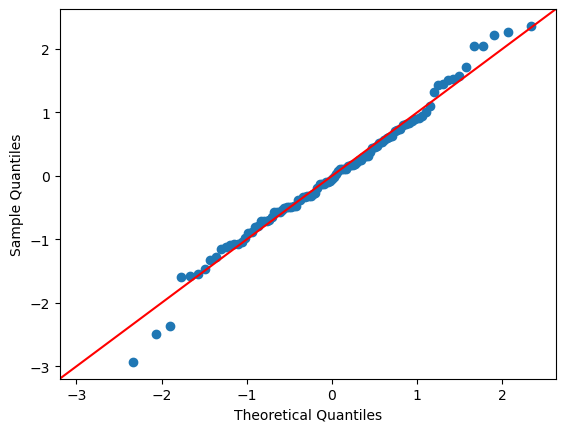

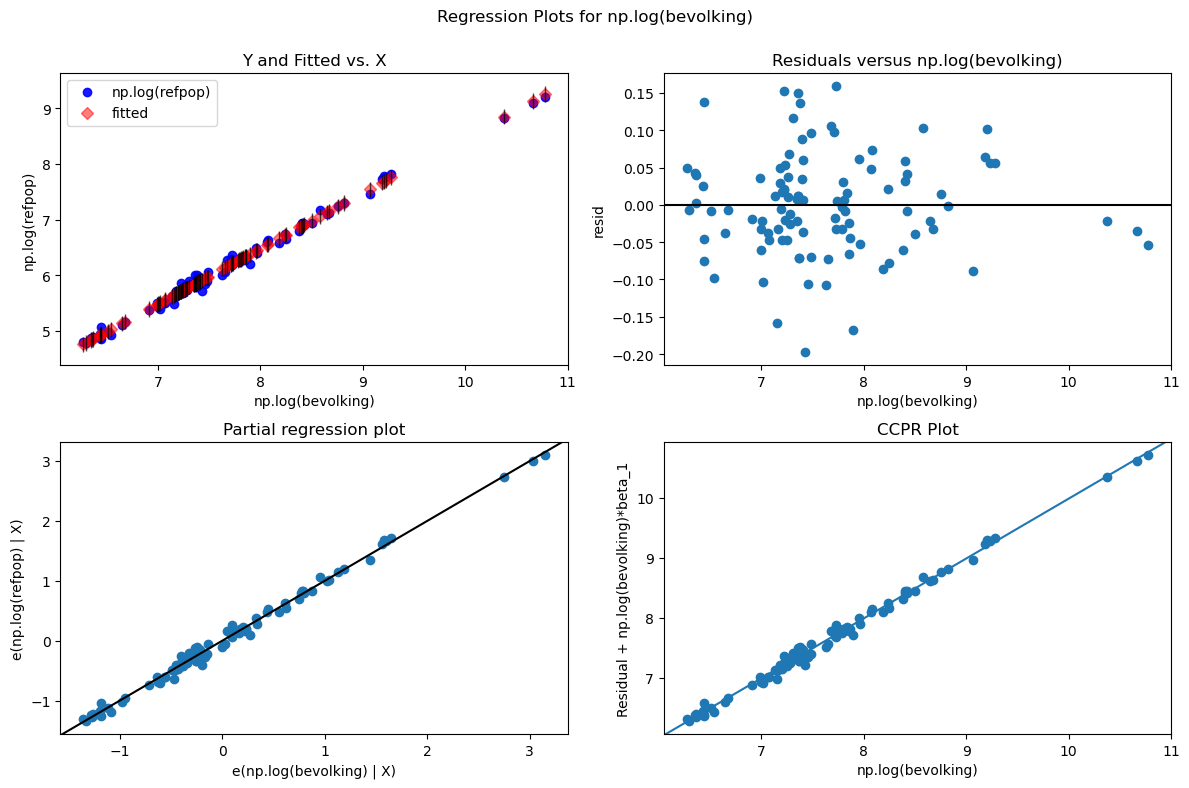

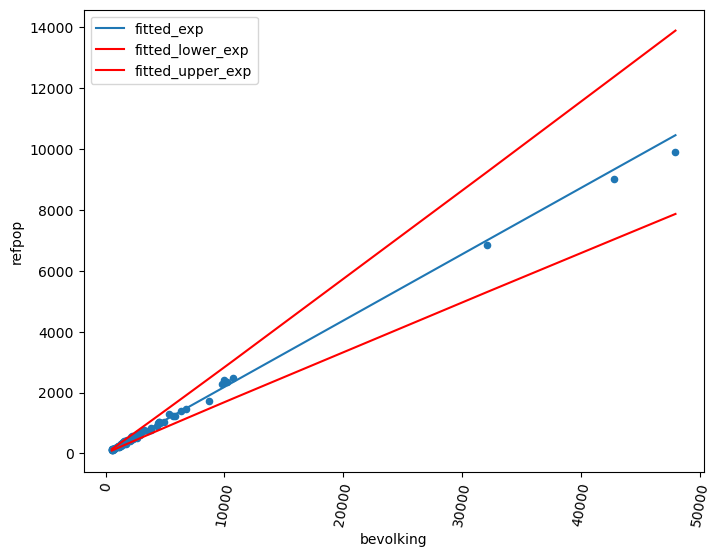

In [826]:
# predict household size with bevolking

plot_df = cbs_large_long
plot_df = cbs_large_long.query("refpop_source == 'refpop_hh'").copy()
# plot_df = cbs_large_long.query("refpop_source == 'refpop_hh'").copy()
# plot_df_mannelijk = plot_df.query("bevolking_mannelijk > 50 & bevolking_mannelijk < 20000")
# plot_df = plot_df.query("bevolking > 50 & bevolking < 20000")
plot_df = plot_df.query("year_mun_id.isin(@tax_records.year_mun_id.unique())").copy()


plot_df = numeric_to_python_dtype(plot_df)

# index of outliers
leave_out = [1625, 5287]
leav_out = []

# create model with log transformed refpop
model_hh = smf.ols(formula='np.log(refpop) ~ np.log(bevolking)', data=plot_df.loc[~plot_df.index.isin(leave_out)])

# create model with log transformed refpop
# model_hh = smf.ols(formula='np.log(refpop) ~ np.log(bevolking_mannelijk)', data=plot_df)

results_hh = model_hh.fit()

# create fitted_df
fitted_df_hh = create_residuals_df(plot_df, results_hh, 'refpop')
# create model_df (with model parameters)
model_df_hh = create_model_param_df(results_hh, 'hh')

print(results_hh.summary())
fig = sm.qqplot(results_hh.resid, line='45', fit=True)

# inspect results with plots
fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(results_hh, "np.log(bevolking)", fig=fig2)
# plot ci
fig3 = plot_ci(fitted_df_hh)

                              OLS Regression Results                              
Dep. Variable:     np.log(refpop_catprop)   R-squared:                       0.993
Model:                                OLS   Adj. R-squared:                  0.992
Method:                     Least Squares   F-statistic:                     1318.
Date:                    Thu, 13 Jul 2023   Prob (F-statistic):           2.25e-29
Time:                            14:23:09   Log-Likelihood:                 35.541
No. Observations:                      31   AIC:                            -63.08
Df Residuals:                          27   BIC:                            -57.35
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

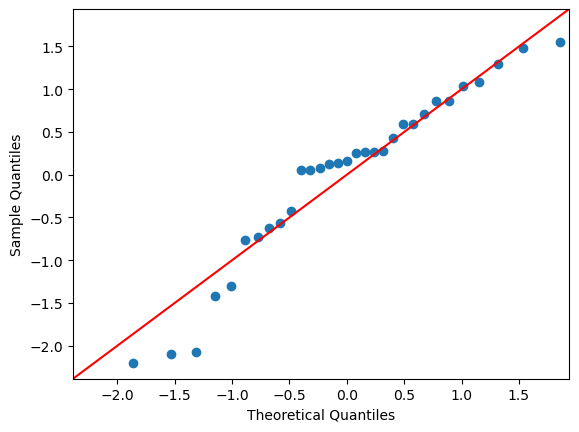

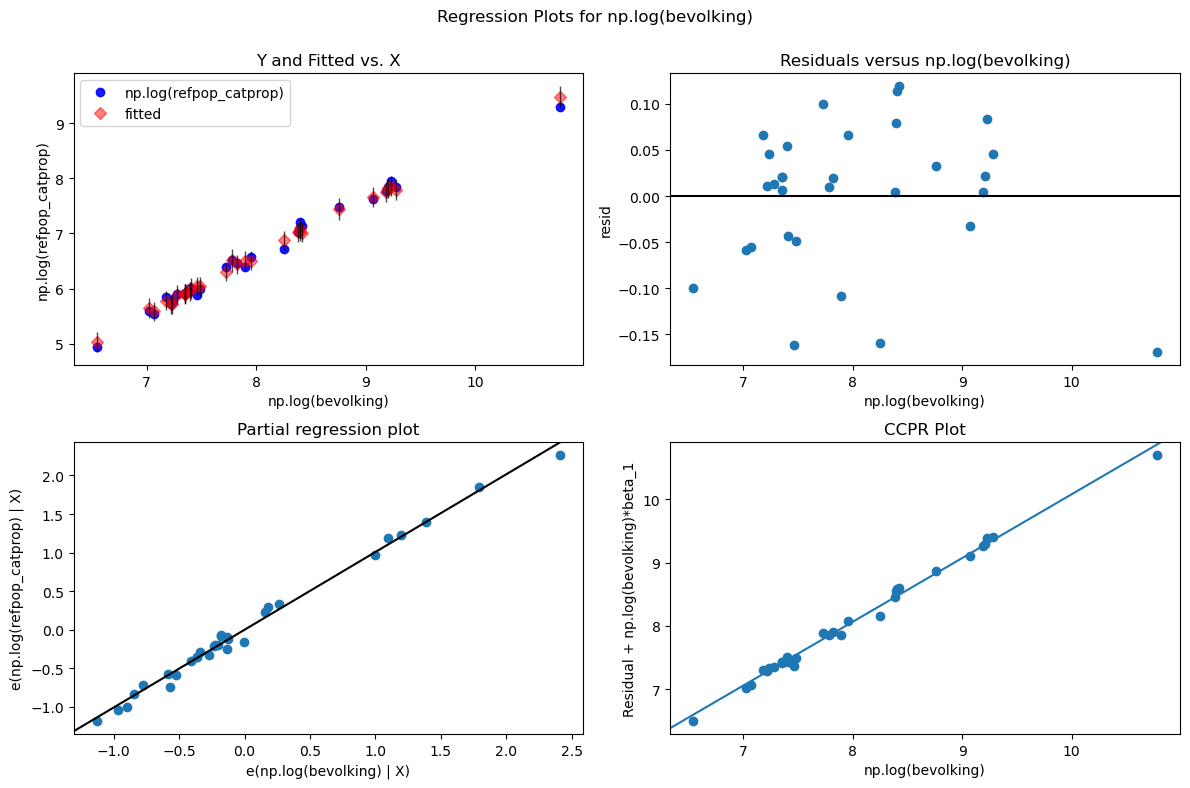

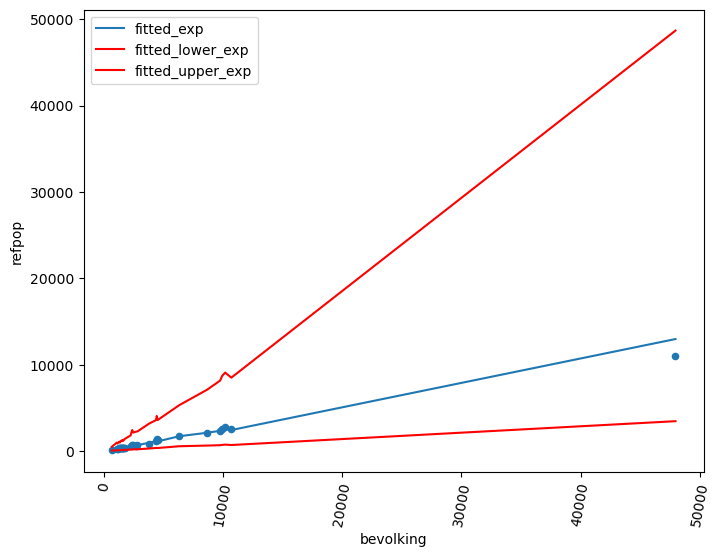

In [829]:
# refpop_catprop model with cat1_pct + cat2_pct
plot_df = cbs_large_long_prep.query("cat1_pct.notna() & refpop_catprop.notna()").copy()
plot_df = numeric_to_python_dtype(plot_df)

# plot_df = plot_df.query("bevolking < 20000")

# index of outliers
leave_out = [1625, 5287]
leav_out = []

## beter model incl 20000 inwoners en groter
model_pct = smf.ols(formula='np.log(refpop_catprop) ~ np.log(bevolking) + cat1_pct + cat2_pct', data=plot_df.loc[~plot_df.index.isin(leave_out)])
results_pct = model_pct.fit()

# create fitted_df
fitted_df_pcts = create_residuals_df(plot_df, results_pct, 'refpop_catprop')
# create model_df (with model parameters)
model_df_catprop_pct = create_model_param_df(results_pct, 'catprop_pct')

# print results
print(results_pct.summary())
# plot residuals
fig = sm.qqplot(results_pct.resid, line='45', fit=True)
# inspect results with plots
fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(results_pct, "np.log(bevolking)", fig=fig2)

fig3 = plot_ci(fitted_df_pcts)

                              OLS Regression Results                              
Dep. Variable:     np.log(refpop_catprop)   R-squared:                       0.993
Model:                                OLS   Adj. R-squared:                  0.992
Method:                     Least Squares   F-statistic:                     1318.
Date:                    Thu, 13 Jul 2023   Prob (F-statistic):           2.25e-29
Time:                            13:04:08   Log-Likelihood:                 35.541
No. Observations:                      31   AIC:                            -63.08
Df Residuals:                          27   BIC:                            -57.35
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

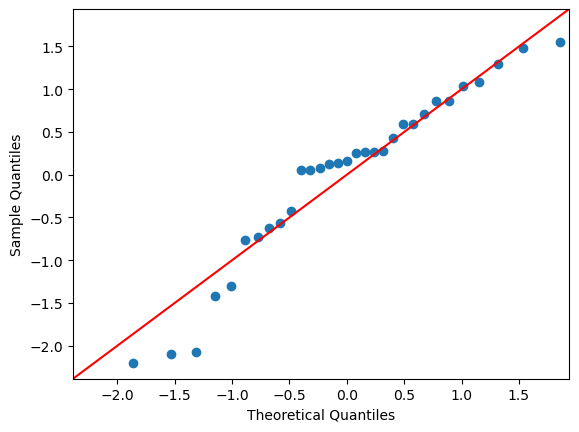

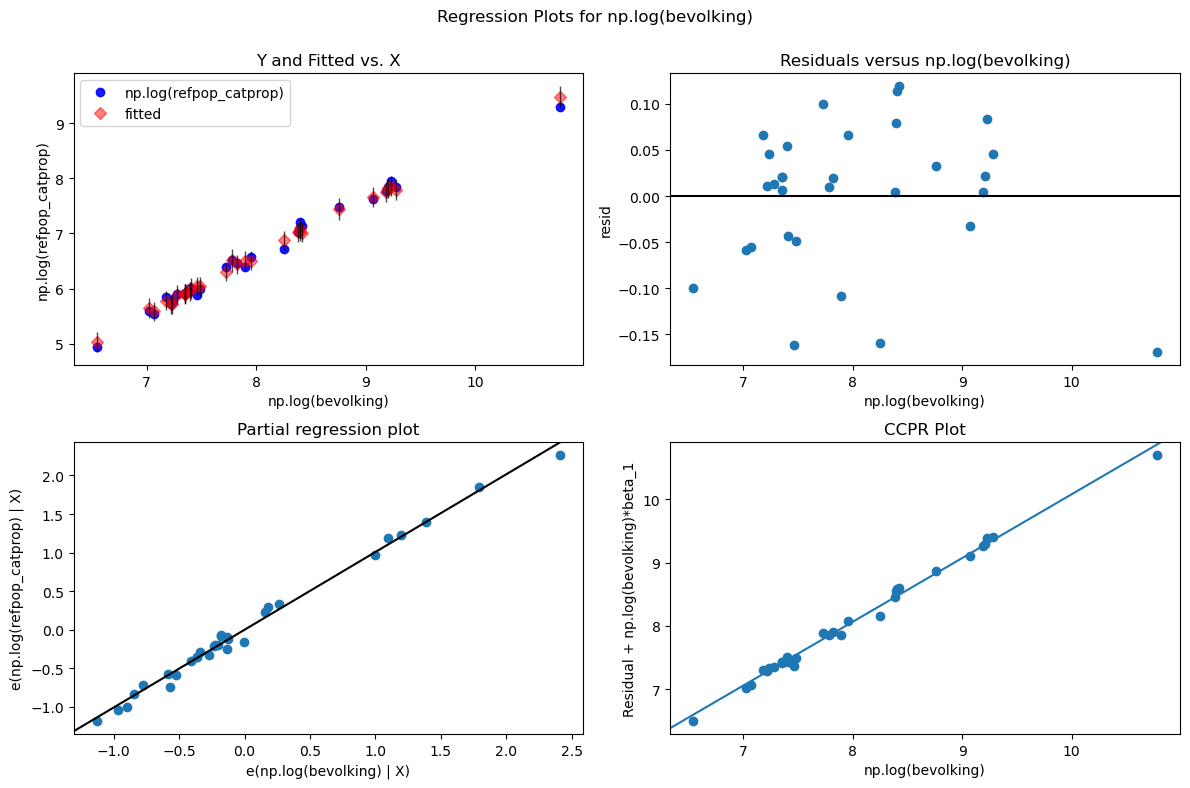

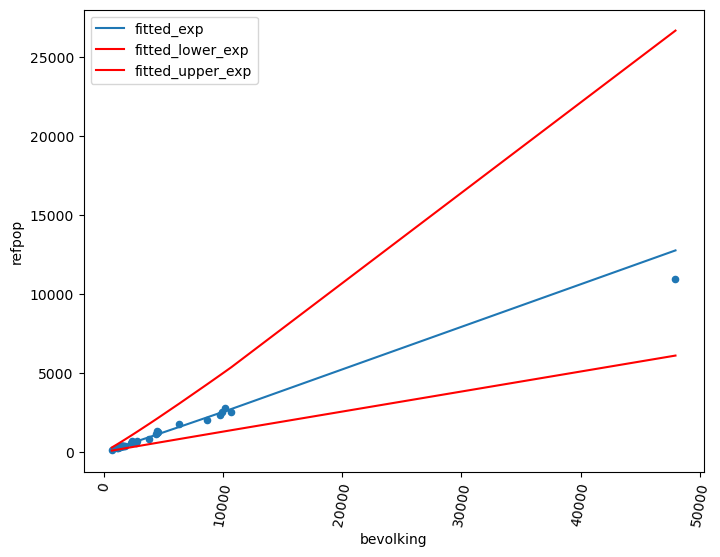

In [792]:
# refpop_catprop zonder pcts
plot_df = cbs_large_long_prep.query("cat1_pct.notna() & refpop_catprop.notna()").copy()
plot_df = numeric_to_python_dtype(plot_df)

# plot_df = plot_df.query("bevolking < 20000")

# index of outliers
leave_out = [1625, 5287]
leav_out = []

# model zonder pcts
model_no_pct = smf.ols(formula='np.log(refpop_catprop) ~ np.log(bevolking)', data=plot_df.loc[~plot_df.index.isin(leave_out)])
results_no_pct = model_no_pct.fit()
fitted_df_no_pcts = create_residuals_df(plot_df, results_no_pct, 'refpop_catprop')

# create model_df (with model parameters)
model_df_catprop= create_model_param_df(results_no_pct, 'catprop')

# print results
print(results_pct.summary())
# plot residuals
fig = sm.qqplot(results_pct.resid, line='45', fit=True)
# inspect results with plots
fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(results_pct, "np.log(bevolking)", fig=fig2)

fig4 = plot_ci(fitted_df_no_pcts)

### Export models

In [795]:
# merge model_df's
models_df = pd.concat([model_df_hh, model_df_catprop_pct, model_df_catprop], axis=0)
models_df

,model_name,model_coef,Intercept,np.log(bevolking),cat1_pct,cat2_pct
0,hh,params,-1.510548,0.998846,NaN,NaN
1,hh,lwr,-1.628787,0.983447,NaN,NaN
2,hh,upr,-1.392309,1.014246,NaN,NaN
0,catprop_pct,params,-1.215228,1.007892,-0.352294,1.565599
1,catprop_pct,lwr,-1.745873,0.970899,-0.741665,0.113739
2,catprop_pct,upr,-0.684584,1.044884,0.037077,3.017458
0,catprop,params,-1.652120,1.030560,NaN,NaN
1,catprop,lwr,-1.967253,0.991398,NaN,NaN
2,catprop,upr,-1.336986,1.069723,NaN,NaN


In [823]:
models_df.to_csv("refpop_models_v1.csv", index=False)

## Old experiments and plots

                            OLS Regression Results                            
Dep. Variable:      np.log(refpop_hh)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.656e+04
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          8.45e-114
Time:                        11:38:53   Log-Likelihood:                 131.94
No. Observations:                 103   AIC:                            -259.9
Df Residuals:                     101   BIC:                            -254.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5105      0.06

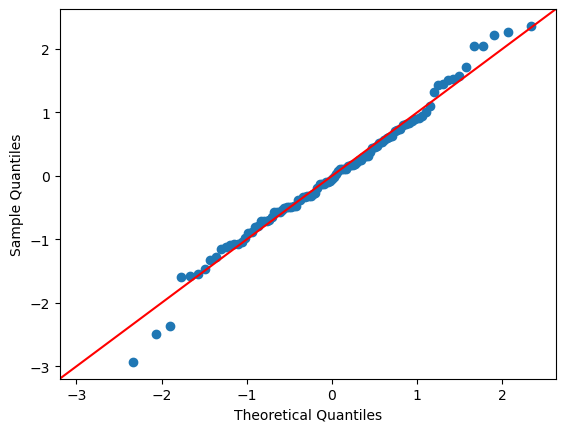

In [577]:
# # predict hh 
# plot_df = cbs_large_long_prep.query("cat1_pct.notna()").copy()
# plot_df = cbs_large_long_prep.query("cat1_pct.notna() & refpop_hh.notna()").copy()
plot_df = cbs_large_long_prep.query("refpop_hh.notna() & year_mun_id.isin(@tax_records.year_mun_id.unique())").copy()


plot_df = numeric_to_python_dtype(plot_df)

# index of outliers
leave_out = [1625, 5287]
leav_out = []

# plot_df = plot_df.query("bevolking_mannelijk > 0")
# plot_df = plot_df.query("bevolking < 20000")

plot_df['woning_ratio'] = plot_df['bewoonde_huizen_schepen'] / plot_df['bevolking']
# plot_df.dropna(subset=['bevolking_mannelijk', 'refpop_catprop'], inplace=True)


# # create model with log transformed refpop
# model = smf.ols(formula='np.log(refpop_catprop) ~ np.log(bevolking_mannelijk) + cat1_pct + cat2_pct', data=plot_df.loc[~plot_df.index.isin(leave_out)])
# model = smf.ols(formula='np.log(refpop_catprop) ~ np.log(bevolking) + woning_ratio + cat1_pct', data=plot_df.loc[~plot_df.index.isin(leave_out)])
# model = smf.ols(formula='np.log(refpop_catprop) ~ np.log(bevolking) + cat1_pct', data=plot_df.loc[~plot_df.index.isin(leave_out)])

# beter model voor 20000 en minder inwoners
model = smf.ols(formula='np.log(refpop_hh) ~ np.log(bevolking)', data=plot_df.loc[~plot_df.index.isin(leave_out)])

# beter model incl 20000 inwoners en groter
# model = smf.ols(formula='np.log(refpop_catprop) ~ np.log(bevolking) + cat1_pct + cat2_pct', data=plot_df.loc[~plot_df.index.isin(leave_out)])
# model = smf.ols(formula='np.log(refpop_catprop) ~ np.log(bevolking_mannelijk) + cat1_pct + cat2_pct', data=plot_df.loc[~plot_df.index.isin(leave_out)])



# model = smf.ols(formula='refpop_catprop ~ bevolking + cat1_pct + cat2_pct', data=plot_df.loc[~plot_df.index.isin(leave_out)])


# model = smf.ols(formula='np.log(refpop) ~ np.log(bevolking)', data=plot_df.loc[~plot_df.index.isin(leave_out)])


# create model with log transformed refpop
# model = smf.ols(formula='np.log(refpop) ~ np.log(bevolking_mannelijk)', data=plot_df_mannelijk)

results = model.fit()

print(results.summary())

# plot residuals
fig = sm.qqplot(results.resid, line='45', fit=True)

/var/folders/rb/qqpn60cd2g1g561m_1tcrzvr0000gq/T/ipykernel_12710/4120245984.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


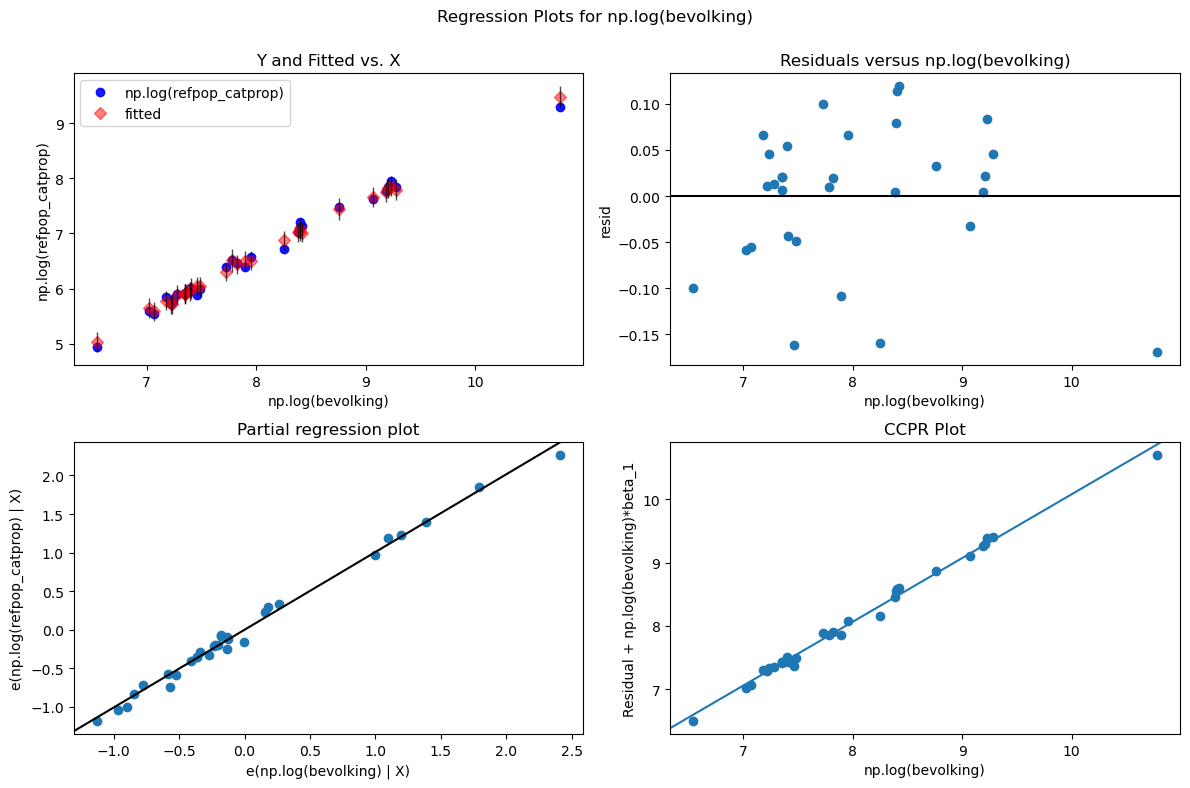

In [621]:
# inspect results with plots
fig = plt.figure(figsize=(12,8))
# fig = sm.graphics.plot_regress_exog(results, "np.log(bewoonde_huizen_schepen)", fig=fig)
# fig = sm.graphics.plot_regress_exog(results, "bevolking", fig=fig)
fig = sm.graphics.plot_regress_exog(results_pct, "np.log(bevolking)", fig=fig)

# fig = sm.graphics.plot_regress_exog(results, "year", fig=fig)


fig.show()

In [553]:
# get df with residuals
# residuals_df = pd.DataFrame({'residuals' : results.resid, 'fitted' : results.fittedvalues, 'refpop' : plot_df.refpop, 'bevolking' : plot_df.bevolking, 'bevolking_mannelijk' : plot_df.bevolking_mannelijk, 'year' : plot_df.year})
residuals_df = pd.DataFrame({'residuals' : results.resid, 'fitted' : results.fittedvalues, 'refpop' : plot_df.refpop_hh, 'bevolking' : plot_df.bevolking, 'bevolking_mannelijk' : plot_df.bevolking_mannelijk, 'year' : plot_df.year})


residuals_df['fitted_exp'] = np.exp(residuals_df.fitted)
# residuals_df['fitted_exp'] = residuals_df.fitted

residuals_df['verschil'] = (residuals_df.refpop - residuals_df.fitted_exp).abs()
# residuals_df['verschil'] = (residuals_df.refpop - residuals_df.fitted_exp).abs()

residuals_df['verschil_pct'] = residuals_df.verschil / residuals_df.fitted_exp

residuals_df = residuals_df.sort_values('bevolking')

residuals_df.head()

,residuals,fitted,refpop,bevolking,bevolking_mannelijk,year,fitted_exp,verschil,verschil_pct
6606,0.048928,4.755093,122.0,530.0,269.0,1899,116.174508,5.825492,0.050144
6372,-0.006772,4.777457,118.0,542.0,282.0,1899,118.801806,0.801806,0.006749
5451,0.042185,4.833012,131.0,573.0,295.0,1889,125.588685,5.411315,0.043088
5249,0.002497,4.841690,127.0,578.0,294.0,1889,126.683303,0.316697,0.002500
3024,0.040055,4.850294,133.0,583.0,NaN,1869,127.777909,5.222091,0.040868


In [523]:
residuals_df.shape

(31, 9)

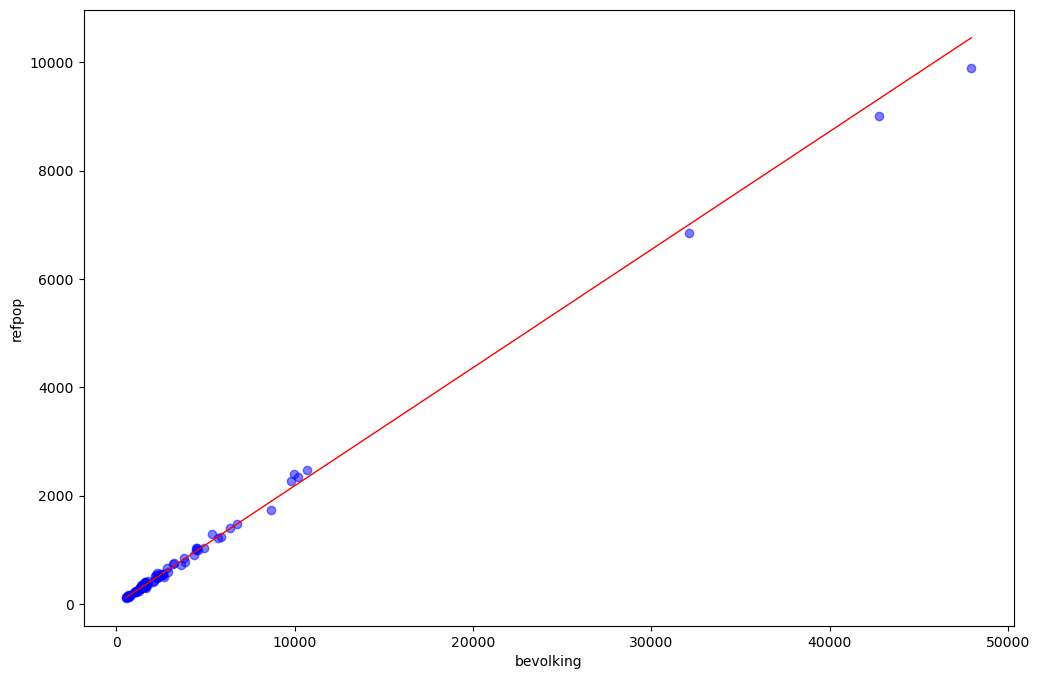

In [530]:
# plot refpop values, and fitted_exp values (as a line)

# filter out rows without residuals
residuals_df_filt = residuals_df.query("residuals.notna()").copy()

plt.figure(figsize=(12,8))
plt.scatter(residuals_df_filt.bevolking, residuals_df_filt.refpop, color='blue', alpha=0.5)
plt.plot(residuals_df_filt.bevolking, residuals_df_filt.fitted_exp, color='red', linewidth=1)
# plt.scatter(residuals_df.bevolking, residuals_df.fitted_exp, color='red', linewidth=1)

plt.xlabel('bevolking')
plt.ylabel('refpop')
plt.show()

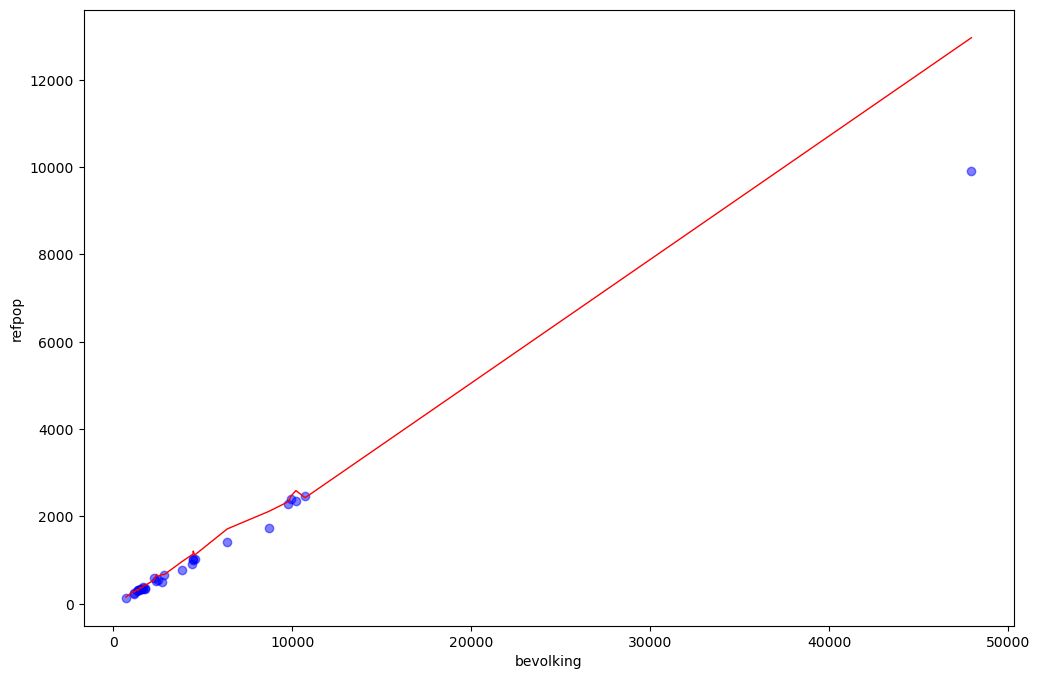

In [542]:
# plot refpop values, and fitted_exp values (as a line)

# filter out rows without residuals
residuals_df_filt = residuals_df.query("residuals.notna()").copy()

plt.figure(figsize=(12,8))
plt.scatter(residuals_df_filt.bevolking, residuals_df_filt.refpop, color='blue', alpha=0.5)
plt.plot(residuals_df_filt.bevolking, residuals_df_filt.fitted_exp, color='red', linewidth=1)
# plt.scatter(residuals_df.bevolking, residuals_df.fitted_exp, color='red', linewidth=1)

plt.xlabel('bevolking')
plt.ylabel('refpop')
plt.show()

In [544]:
residuals_df.groupby("year")['verschil_pct'].agg(['mean', 'count'])

,mean,count
year,,
1859,0.072024,6
1869,0.093234,5
1879,0.106060,4
1889,0.106115,5
1899,0.146599,10
1920,0.235964,1


In [532]:
cbs_large_long_prep.query("cat1_pct.notna()").groupby("year").size()

year
1859     6
1869     5
1879     4
1889     5
1899    10
1909    16
1920    17
dtype: int64

In [536]:
plot_df.query("cat1_pct.notna()").cat1_pct

1274    0.917
1438    0.698
1464    0.982
1656    0.901
1754    0.878
2290    0.951
2594    0.987
2631    0.841
2830    0.857
2986    1.000
3411    0.791
3752    0.915
3812    0.784
3949    0.971
4527    0.721
4801    0.852
4866    0.829
4926    0.724
5064    0.827
5070    0.932
5794    0.912
5795    0.927
5796    0.927
5877    0.806
5953    0.876
6016    0.800
6742    0.852
6779    0.601
6797    0.880
6857    0.828
8460    0.780
Name: cat1_pct, dtype: float64

In [517]:
cbs_large_long_prep.query("cat1_pct.notna() & year == 1920")

,year,amco,municipality,bewoonde_huizen,bewoonde_schepen,afzonderlijk_levenden,huisgezinnen,bevolking,beroepsbevolking,bewoonde_huizen_schepen,...,cat2_pct,cat3_pct,cat4_pct,refpop_catprop,amco_year,year_mun_id,refpop_brp,refpop_hh,bevolking_mannelijk,verschil_catprop_hh
8194,1920,11020,Aardenburg,536.0,0.0,0.0,<NA>,2136.0,<NA>,536.0,...,0.038,0.095,0.009,NaN,11020_1920,1919_Aardenburg,<NA>,<NA>,1044.0,<NA>
8280,1920,10259,Beesd,537.0,2.0,0.0,<NA>,2518.0,<NA>,539.0,...,0.091,0.187,0.028,NaN,10259_1920,1920_Beesd,<NA>,<NA>,1303.0,<NA>
8355,1920,10030,Brouwershaven,336.0,1.0,0.0,<NA>,1315.0,<NA>,337.0,...,0.103,0.075,0.031,NaN,10030_1920,1920_Brouwershaven,<NA>,<NA>,622.0,<NA>
8417,1920,10327,Doesburg,997.0,11.0,0.0,<NA>,4672.0,<NA>,1008.0,...,0.118,0.133,0.030,NaN,10327_1920,1920_Doesburg,<NA>,<NA>,2248.0,<NA>
8460,1920,11298,Eindhoven,8089.0,1.0,827.0,9078.0,47946.0,<NA>,8090.0,...,0.062,0.138,0.021,10947.0,11298_1920,1917_Eindhoven,<NA>,9905.0,23964.0,1042.0
8496,1920,10529,Geldrop,703.0,0.0,0.0,<NA>,3686.0,<NA>,703.0,...,0.034,0.114,0.007,NaN,10529_1920,1920_Geldrop,<NA>,<NA>,1832.0,<NA>
8573,1920,10673,Hattem,862.0,14.0,0.0,<NA>,4165.0,<NA>,876.0,...,0.176,0.081,0.022,NaN,10673_1920,1920_Hattem,<NA>,<NA>,2161.0,<NA>
8729,1920,11017,Leende,289.0,0.0,0.0,<NA>,1552.0,<NA>,289.0,...,0.049,0.135,0.024,NaN,11017_1920,1920_Leende,<NA>,<NA>,817.0,<NA>
8778,1920,11261,Maasniel,560.0,0.0,0.0,<NA>,3348.0,<NA>,560.0,...,0.065,0.063,0.012,NaN,11261_1920,1920_Maasniel,<NA>,<NA>,1750.0,<NA>
8791,1920,11416,Meerlo,379.0,0.0,0.0,<NA>,2061.0,<NA>,379.0,...,0.026,0.316,0.053,NaN,11416_1920,1920_Meerlo,<NA>,<NA>,1041.0,<NA>


In [484]:
cbs_large_long_prep['verschil_catprop_hh'] =  cbs_large_long_prep['refpop_catprop'] - cbs_large_long_prep['refpop_hh']

cbs_large_long_prep.query("verschil_catprop_hh.notna()")

,year,amco,municipality,bewoonde_huizen,bewoonde_schepen,afzonderlijk_levenden,huisgezinnen,bevolking,beroepsbevolking,bewoonde_huizen_schepen,...,cat2_pct,cat3_pct,cat4_pct,refpop_catprop,amco_year,year_mun_id,refpop_brp,refpop_hh,bevolking_mannelijk,verschil_catprop_hh
1274,1859,11020,Aardenburg,308.0,0.0,54.0,337.0,1635.0,<NA>,308.0,...,0.019,0.064,0.000,405.0,11020_1859,1859_Aardenburg,<NA>,391.0,789.0,14.0
1438,1859,10030,Brouwershaven,271.0,17.0,12.0,336.0,1648.0,<NA>,288.0,...,0.000,0.287,0.016,388.0,10030_1859,1859_Brouwershaven,<NA>,348.0,763.0,40.0
1464,1859,11316,Cothen,118.0,0.0,3.0,135.0,695.0,<NA>,118.0,...,0.000,0.018,0.000,139.0,11316_1859,1859_Cothen,<NA>,138.0,373.0,1.0
1656,1859,10909,Harlingen,1463.0,69.0,200.0,2075.0,9773.0,<NA>,1532.0,...,0.019,0.074,0.006,2347.0,10909_1859,1859_Harlingen,<NA>,2275.0,4701.0,72.0
1754,1859,11408,Hulst,414.0,0.0,91.0,490.0,2265.0,<NA>,414.0,...,0.025,0.092,0.004,602.0,11408_1859,1859_Hulst,<NA>,581.0,1017.0,21.0
2290,1859,11414,"Vessem, Wintelre en Knegsel",225.0,0.0,9.0,238.0,1172.0,<NA>,225.0,...,0.011,0.038,0.000,253.0,11414_1859,"1859_Vessem,_Wintelre_en_Knegsel",<NA>,247.0,591.0,6.0
2594,1869,11006,Bladel en Netersel,286.0,0.0,18.0,287.0,1365.0,<NA>,286.0,...,0.000,0.013,0.000,306.0,11006_1869,1869_Bladel_en_Netersel,<NA>,305.0,<NA>,1.0
2631,1869,10030,Brouwershaven,301.0,8.0,15.0,327.0,1738.0,<NA>,309.0,...,0.020,0.132,0.007,357.0,10030_1869,1869_Brouwershaven,<NA>,342.0,<NA>,15.0
2830,1869,10909,Harlingen,1935.0,130.0,188.0,2217.0,9945.0,<NA>,2065.0,...,0.035,0.104,0.004,2532.0,10909_1869,1870_Harlingen,<NA>,2405.0,<NA>,127.0
2986,1869,11017,Leende,306.0,0.0,15.0,306.0,1389.0,<NA>,306.0,...,0.000,0.000,0.000,321.0,11017_1869,1870_Leende,<NA>,321.0,<NA>,0.0


In [478]:
plot_df

,year,amco,municipality,bewoonde_huizen,bewoonde_schepen,afzonderlijk_levenden,huisgezinnen,bevolking,beroepsbevolking,bewoonde_huizen_schepen,...,cat2_pct,cat3_pct,cat4_pct,refpop_catprop,amco_year,year_mun_id,refpop_brp,refpop_hh,bevolking_mannelijk,woning_ratio
1274,1859,11020,Aardenburg,308.0,0.0,54.0,337.0,1635.0,NaN,308.0,...,0.019,0.064,0.000,405.0,11020_1859,1859_Aardenburg,NaN,391.0,789.0,0.188379
1438,1859,10030,Brouwershaven,271.0,17.0,12.0,336.0,1648.0,NaN,288.0,...,0.000,0.287,0.016,388.0,10030_1859,1859_Brouwershaven,NaN,348.0,763.0,0.174757
1464,1859,11316,Cothen,118.0,0.0,3.0,135.0,695.0,NaN,118.0,...,0.000,0.018,0.000,139.0,11316_1859,1859_Cothen,NaN,138.0,373.0,0.169784
1656,1859,10909,Harlingen,1463.0,69.0,200.0,2075.0,9773.0,NaN,1532.0,...,0.019,0.074,0.006,2347.0,10909_1859,1859_Harlingen,NaN,2275.0,4701.0,0.156758
1754,1859,11408,Hulst,414.0,0.0,91.0,490.0,2265.0,NaN,414.0,...,0.025,0.092,0.004,602.0,11408_1859,1859_Hulst,NaN,581.0,1017.0,0.182781
2290,1859,11414,"Vessem, Wintelre en Knegsel",225.0,0.0,9.0,238.0,1172.0,NaN,225.0,...,0.011,0.038,0.000,253.0,11414_1859,"1859_Vessem,_Wintelre_en_Knegsel",NaN,247.0,591.0,0.191980
2594,1869,11006,Bladel en Netersel,286.0,0.0,18.0,287.0,1365.0,NaN,286.0,...,0.000,0.013,0.000,306.0,11006_1869,1869_Bladel_en_Netersel,NaN,305.0,NaN,0.209524
2631,1869,10030,Brouwershaven,301.0,8.0,15.0,327.0,1738.0,NaN,309.0,...,0.020,0.132,0.007,357.0,10030_1869,1869_Brouwershaven,NaN,342.0,NaN,0.177791
2830,1869,10909,Harlingen,1935.0,130.0,188.0,2217.0,9945.0,NaN,2065.0,...,0.035,0.104,0.004,2532.0,10909_1869,1870_Harlingen,NaN,2405.0,NaN,0.207642
2986,1869,11017,Leende,306.0,0.0,15.0,306.0,1389.0,NaN,306.0,...,0.000,0.000,0.000,321.0,11017_1869,1870_Leende,NaN,321.0,NaN,0.220302


In [475]:
plot_df.query("bevolking > 10000")

,year,amco,municipality,bewoonde_huizen,bewoonde_schepen,afzonderlijk_levenden,huisgezinnen,bevolking,beroepsbevolking,bewoonde_huizen_schepen,...,cat2_pct,cat3_pct,cat4_pct,refpop_catprop,amco_year,year_mun_id,refpop_brp,refpop_hh,bevolking_mannelijk,woning_ratio
3949,1879,10909,Harlingen,1939.0,84.0,201.0,2275.0,10712.0,NaN,2023.0,...,0.000,0.029,0.000,2543.0,10909_1879,1881_Harlingen,NaN,2476.0,NaN,0.188854
5064,1889,10909,Harlingen,NaN,68.0,221.0,2133.0,10195.0,3406.0,NaN,...,0.041,0.127,0.005,2817.0,10909_1889,1889_Harlingen,3406.0,2354.0,4846.0,NaN
8460,1920,11298,Eindhoven,8089.0,1.0,827.0,9078.0,47946.0,NaN,8090.0,...,0.062,0.138,0.021,10947.0,11298_1920,1917_Eindhoven,NaN,9905.0,23964.0,0.168731


In [537]:
# residuals_df.sort_values('verschil', ascending=False).head(20)
residuals_df.sort_values('verschil_pct', ascending=False).head(30)

,residuals,fitted,refpop,bevolking,bevolking_mannelijk,year,fitted_exp,verschil,verschil_pct
1873,-0.197008,5.907435,302.0,1680.0,835.0,1859,367.761533,65.761533,0.178816
1754,0.158880,6.205871,581.0,2265.0,1017.0,1859,495.650497,85.349503,0.172197
6129,0.152844,5.702228,349.0,1368.0,698.0,1899,299.533939,49.466061,0.165143
2795,0.149723,5.844238,401.0,1577.0,NaN,1869,345.239444,55.760556,0.161513
6742,-0.167563,6.376153,497.0,2686.0,1423.0,1899,587.662454,90.662454,0.154276
3245,0.138034,4.924561,158.0,628.0,NaN,1869,137.628894,20.371106,0.148015
3914,0.137119,5.861817,403.0,1605.0,NaN,1879,351.362117,51.637883,0.146965
5889,-0.158570,5.635034,239.0,1279.0,623.0,1899,280.068448,41.068448,0.146637
5030,0.115748,5.786885,366.0,1489.0,767.0,1889,325.995930,40.004070,0.122713
2767,0.105918,6.159384,526.0,2162.0,NaN,1869,473.136382,52.863618,0.111730


In [456]:
residuals_df.sort_values('verschil_pct', ascending=False).head(30)

,residuals,fitted,refpop,bevolking,bevolking_mannelijk,year,fitted_exp,verschil,verschil_pct
3411,-0.159786,6.873957,824.0,3830.0,NaN,1869,966.766059,142.766059,0.147674
3812,0.128800,7.006091,1255.0,4532.0,NaN,1879,1103.333185,151.666815,0.137462
2631,-0.134974,6.012709,357.0,1738.0,NaN,1869,408.588850,51.588850,0.126261
4926,0.107650,7.101690,1352.0,4457.0,2141.0,1889,1214.017508,137.982492,0.113658
6742,-0.118481,6.510398,597.0,2686.0,1423.0,1899,672.093772,75.093772,0.111731
1754,0.097356,6.302901,602.0,2265.0,1017.0,1859,546.154159,55.845841,0.102253
6779,0.079602,7.399698,1771.0,6358.0,3224.0,1899,1635.490245,135.509755,0.082856
5953,0.072473,5.776852,347.0,1313.0,650.0,1899,322.741661,24.258339,0.075163
1464,-0.067562,5.002036,139.0,695.0,373.0,1859,148.715686,9.715686,0.065331
6857,-0.067102,7.691232,2047.0,8677.0,4515.0,1899,2189.070525,142.070525,0.064900


In [457]:
residuals_df.query("bevolking < 20000")[['verschil_pct', 'bevolking', 'refpop']].corr()[['verschil_pct']]

,verschil_pct
verschil_pct,1.000000
bevolking,0.019696
refpop,0.019955


<Axes: xlabel='bevolking', ylabel='verschil_pct'>

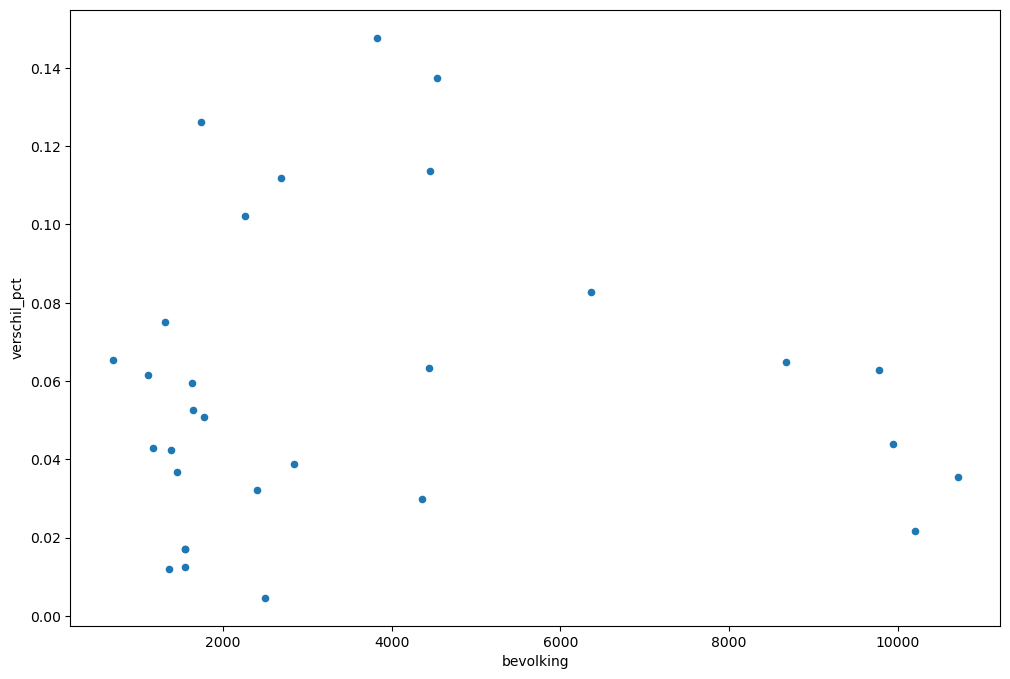

In [458]:
residuals_df.sort_values('verschil', ascending=False).plot(kind='scatter', y='verschil_pct', x='bevolking', figsize=(12,8))

<Axes: xlabel='bevolking', ylabel='verschil_pct'>

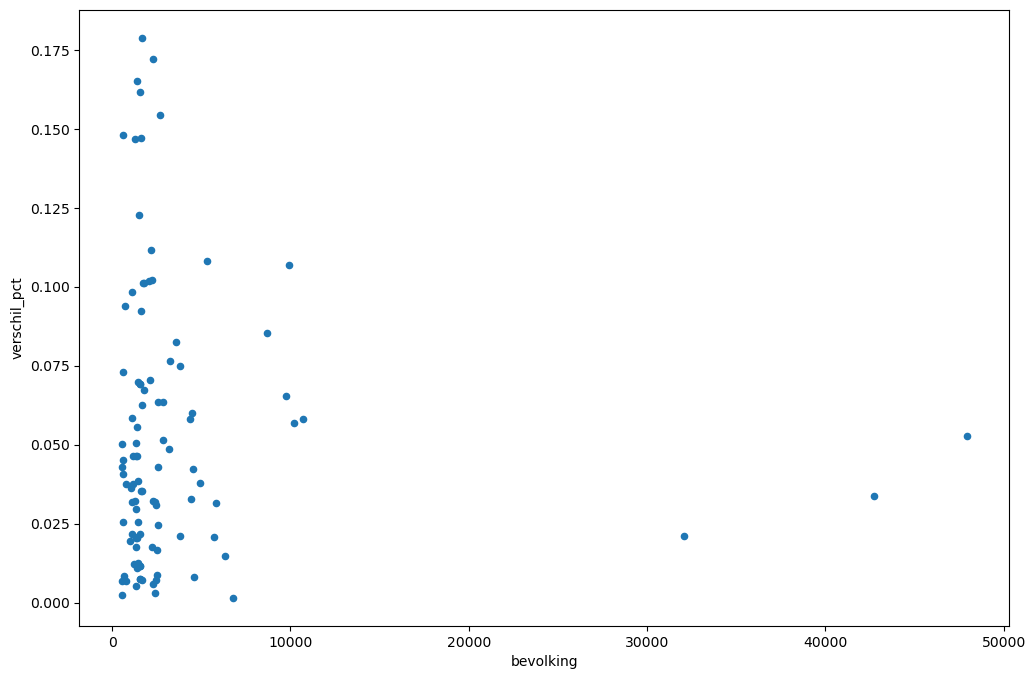

In [90]:
residuals_df.sort_values('verschil', ascending=False).plot(kind='scatter', y='verschil_pct', x='bevolking', figsize=(12,8))


[]

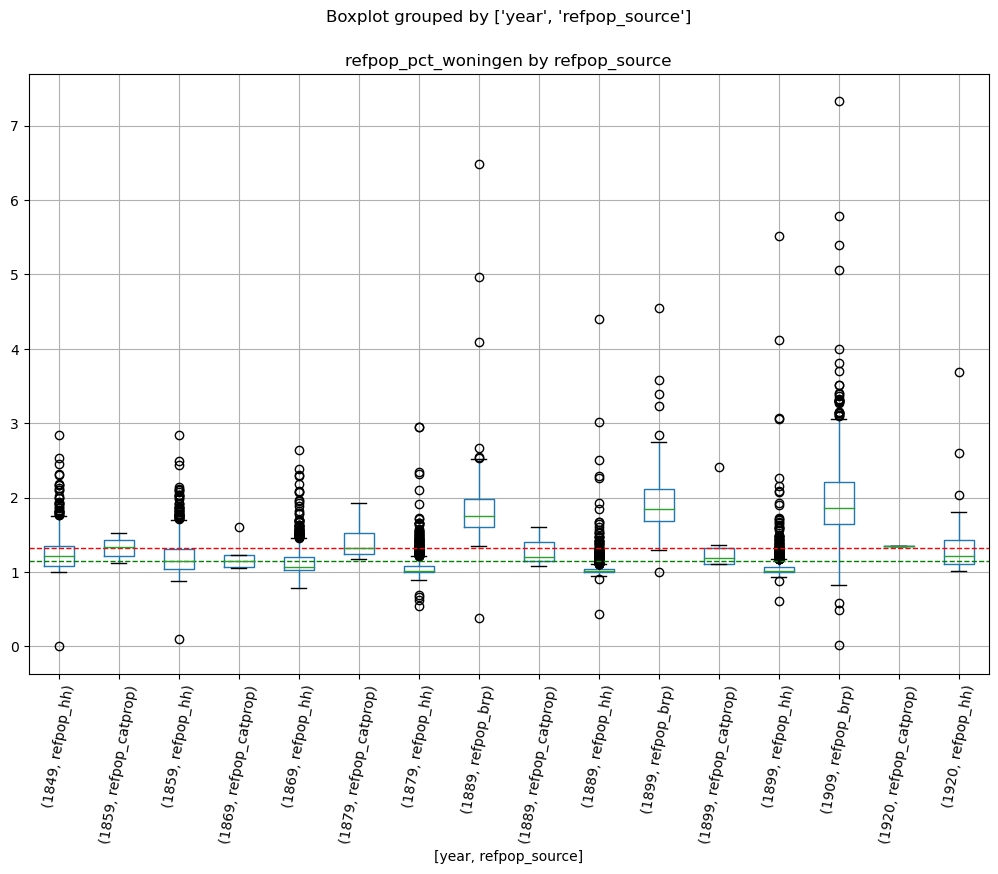

In [235]:
mean_refpop_pct_woningen_catprop =  cbs_large_long.query('refpop_source == "refpop_catprop"').refpop_pct_woningen.mean()
mean_refpop_pct_woningen_hh =  cbs_large_long.query('refpop_source == "refpop_hh"').refpop_pct_woningen.mean()


# plot refpop_pct_bevolking by refpop_source
fig = cbs_large_long.query("refpop_pct_woningen < 10").boxplot(column='refpop_pct_woningen', by=['year', 'refpop_source'], figsize=(12,8), rot=80)
# set title
fig.title.set(text="refpop_pct_woningen by refpop_source")
# set y limit to 0,1
# plt.ylim(0,1)
# add horizontal line at mean_refpop_pct_bevolking_catprop
plt.axhline(mean_refpop_pct_woningen_catprop, color='red', linestyle='dashed', linewidth=1)
# add horzontal line at mean_refpop_pct_bevolking_hh
plt.axhline(mean_refpop_pct_woningen_hh, color='green', linestyle='dashed', linewidth=1)

fig.plot()

[]

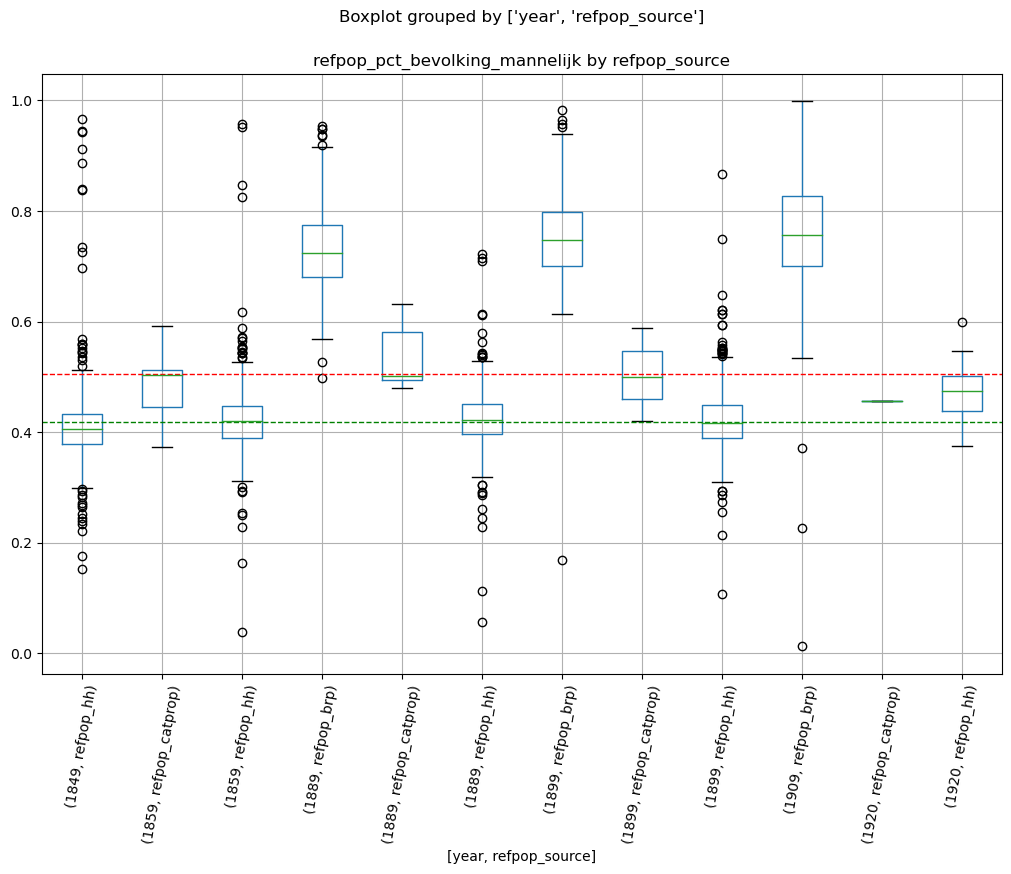

In [239]:
mean_refpop_pct_mannen_catprop =  cbs_large_long.query('refpop_source == "refpop_catprop" & refpop_pct_bevolking_mannelijk < 1').refpop_pct_bevolking_mannelijk.mean()
mean_refpop_pct_mannen_hh =  cbs_large_long.query('refpop_source == "refpop_hh" & refpop_pct_bevolking_mannelijk < 1').refpop_pct_bevolking_mannelijk.mean()


# plot refpop_pct_bevolking by refpop_source
fig = cbs_large_long.query("refpop_pct_bevolking_mannelijk < 1").boxplot(column='refpop_pct_bevolking_mannelijk', by=['year', 'refpop_source'], figsize=(12,8), rot=80)
# set title
fig.title.set(text="refpop_pct_bevolking_mannelijk by refpop_source")
# set y limit to 0,1
# plt.ylim(0,1)
# add horizontal line at mean_refpop_pct_bevolking_catprop
plt.axhline(mean_refpop_pct_mannen_catprop, color='red', linestyle='dashed', linewidth=1)
# add horzontal line at mean_refpop_pct_bevolking_hh
plt.axhline(mean_refpop_pct_mannen_hh, color='green', linestyle='dashed', linewidth=1)

fig.plot()